<a href="https://colab.research.google.com/github/elyorbek8/ML_journey/blob/main/maklerai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To develop a model that can predict prices of houses in Tashkent by thier features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Development stages (plan):

* Understanding the dataset: columns, data types.
* Finding key features, outliers.
* Preprocessing: handling NaNs, encoding, etc.
  * Use transformers and pipelines.
* Model training: try both models (LR, RF).
* Model evaluation: metrices (MAE and RMSE).
* Model deployment: save a superior model.




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


# converting the data types of size and price columns.

In [4]:
df['price'].unique()

array(['52000', '56000', '37000', '49500', '55000', '25500', '21200',
       '20000', '26200', '22200', '24200', '30200', '22500', '32500',
       '45000', '47000', '49900', '76000', '65000', '47500', '30000',
       '32000', '44000', '56500', '35000', '23500', '60500', '68000',
       '41500', '52500', '43000', '80000', '42000', '23000', '88784',
       '97000', '28500', '34500', '51000', '48000', '40000', '67000',
       '40500', '54000', '36000', '63000', '63500', '70000', '91000',
       '83000', '19765', '50000', '86000', '31500', '26500', '14500',
       '27000', '59500', '47299', '38000', '29500', '61500', '46500',
       '58400', '26000', '105000', '53500', '12500', '107000', '39414',
       '60000', '49000', '18000', '42500', '45800', '24000', '58000',
       '55500', '31000', '41000', '50500', '13071', '45188', '53000',
       '25600', '35226', '36500', '142000', '85000', '110000', '69000',
       '28900', '34000', '25000', '39000', '125000', '28000', '43500',
       '39999',

In [5]:
df['size'].unique()

array(['57', '52', '42', '65', '70', '28', '30', '32', '51', '67', '35',
       '43', '90', '80', '69', '96', '76', '45', '27', '64', '26', '72',
       '100', '63', '48', '102', '78', '34', '56', '98', '93', '60', '82',
       '120', '110', '95', '68', '46', '40', '53', '54', '20', '50', '36',
       '58', '74', '94', '85', '125', '64.67', '22', '66', '37', '61',
       '69.65', '88', '38', '55.13', '91', '111', '107', '62', '40.41',
       '75', '84', '117', '47', '33', '187', '29', '11', '122', '119',
       '164', '92', '55', '89', '208', '44', '86', '150', '56.10', '83',
       '49', '142', '115', '350', '81', '89.55', '59', '145', '116', '77',
       '24', '41', '255', '266', '210', '55.62', '140', '141', '60.94',
       '165', '215', '66.82', '128', '97', '130', '105', '137', '47.14',
       '71', '160', '118', '152', '21', '104', '180', '109', '135', '73',
       '39', '39.11', '157', '112', '93.22', '106', '214', '235', '16',
       '300', '57.95', '79', '5', '53.06', '62.50',

In [6]:
df = df[(df['price'] != 'Договорная') & (df['size'] != 'Площадьземли:1сот')]

In [7]:
# converting the data type of price column to int
df['price'] = df['price'].astype('float')

In [8]:
# size data type conversion
df['size'] = df['size'].astype('float')

In [9]:
df.dtypes

,0
location,object
district,object
rooms,int64
size,float64
level,int64
max_levels,int64
price,float64


In [10]:
df.describe()

,rooms,size,level,max_levels,price
count,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
mean,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,3.000000,85.000000,5.000000,9.000000,6.700000e+04
max,10.000000,70000.000000,19.000000,25.000000,5.200000e+07


In [11]:
df.corr(numeric_only= True)

,rooms,size,level,max_levels,price
rooms,1.000000,0.027776,0.136089,0.178846,0.056161
size,0.027776,1.000000,-0.011049,-0.011142,0.001106
level,0.136089,-0.011049,1.000000,0.593694,-0.003449
max_levels,0.178846,-0.011142,0.593694,1.000000,0.011175
price,0.056161,0.001106,-0.003449,0.011175,1.000000


# Visual analysis

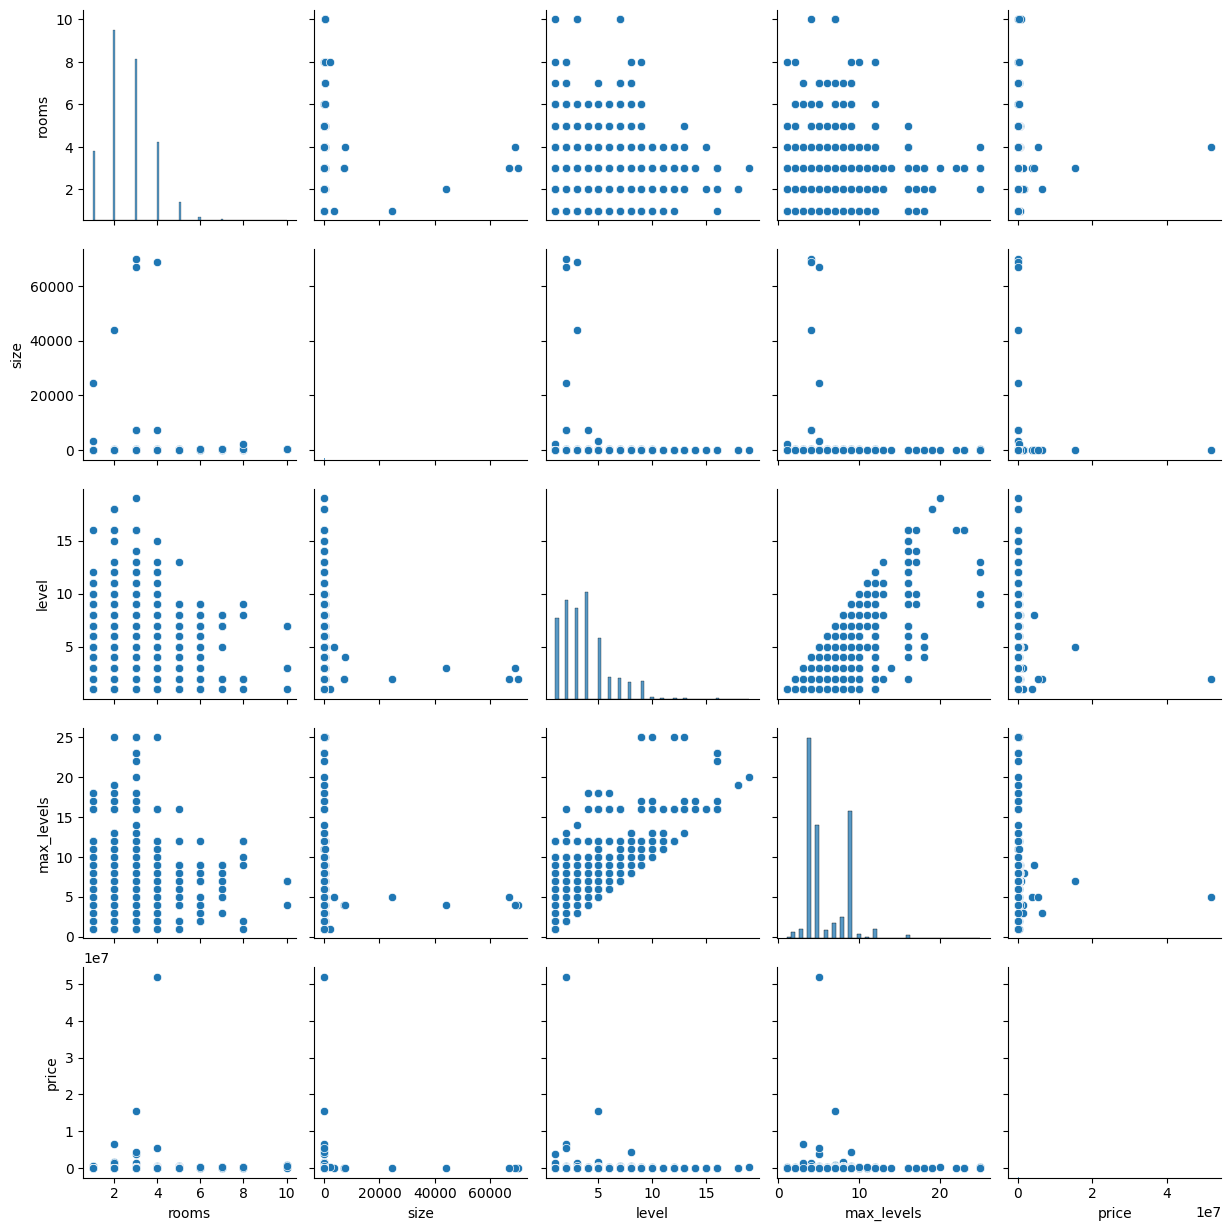

In [12]:
sns.pairplot(data= df)
plt.show()

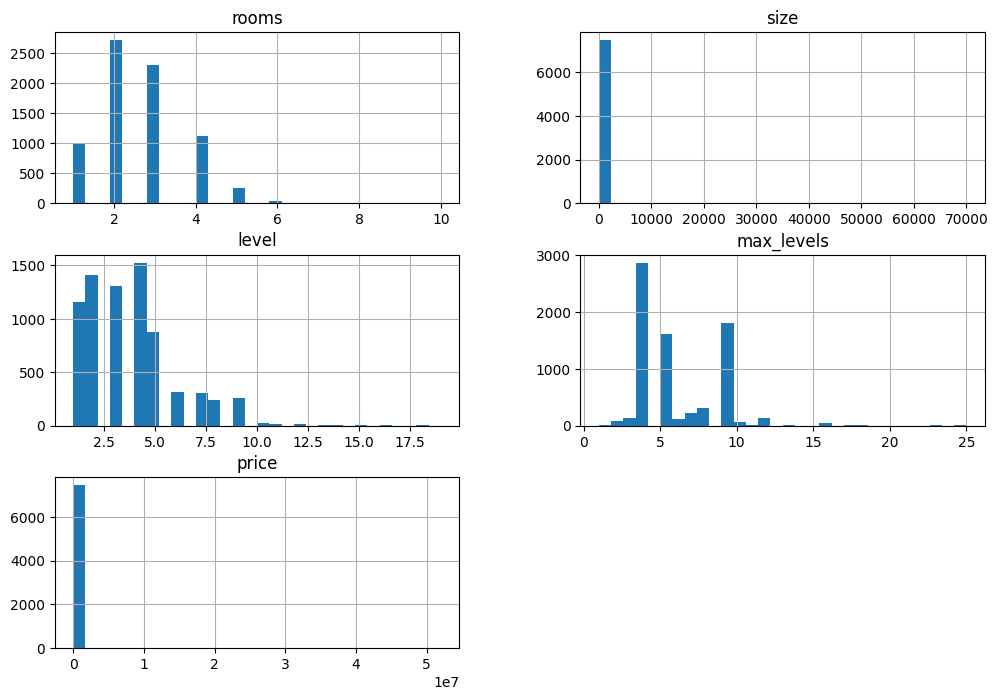

In [ ]:
# histograms of all numeric values
df.hist(figsize= (12, 8), bins= 30)
plt.show()

# Number of rooms.

In [13]:
df['rooms'].describe()

,rooms
count,7465.000000
mean,2.622103
std,1.083155
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,10.000000


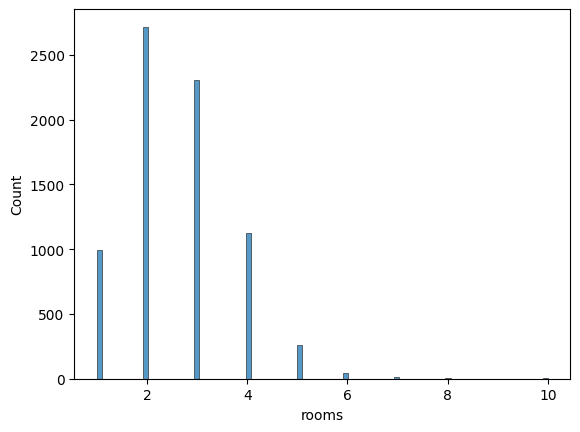

In [ ]:
sns.histplot(data= df, x='rooms')
plt.show()

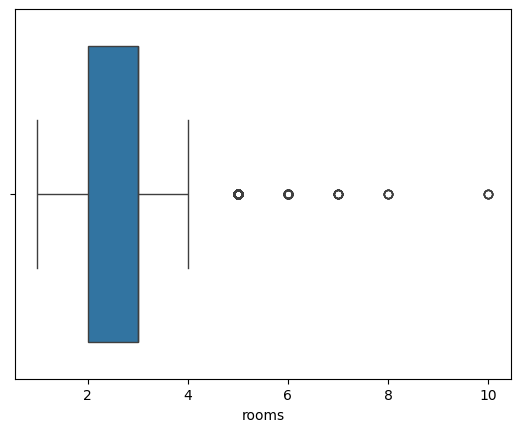

In [ ]:
sns.boxplot(x= df['rooms'])
plt.show()

In [ ]:
df['rooms'].unique()

array([ 3,  2,  1,  4,  5,  8,  6,  7, 10])

In [ ]:
df['rooms'].value_counts()

,count
rooms,
2,2717
3,2308
4,1123
1,993
5,257
6,44
7,12
8,6
10,5


# Area (m sq kv).

In [14]:
df['size'].describe()

,size
count,7465.000000
mean,113.537018
std,1501.157996
min,1.000000
25%,50.000000
50%,65.000000
75%,85.000000
max,70000.000000


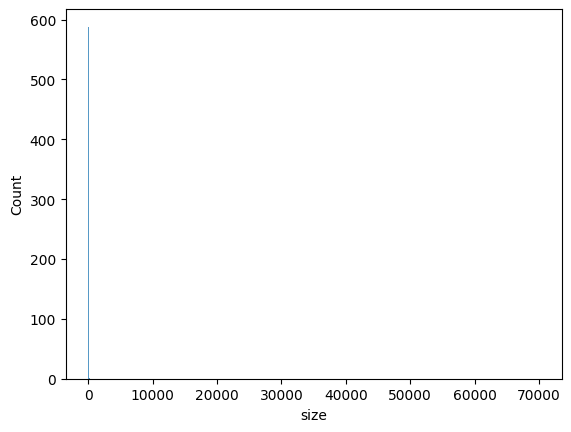

In [ ]:
# histogram of size attribute
sns.histplot(data= df, x= 'size')
plt.show()

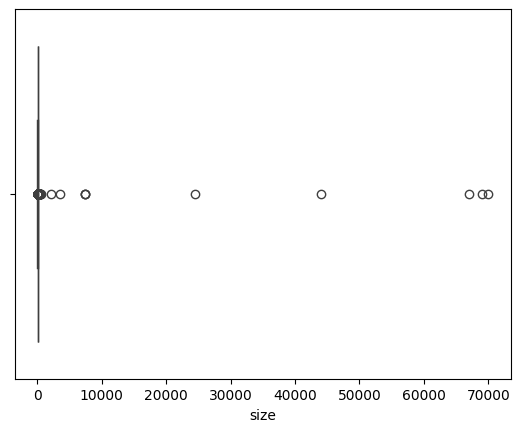

In [ ]:
# boxplot of size
sns.boxplot(data= df, x= 'size')
plt.show()

In [15]:
df['size'].sort_values(ascending=False).head(20)

,size
2547,70000.0
4615,69000.0
5456,67000.0
3089,44000.0
2268,24500.0
7043,7407.0
4784,7359.0
981,7359.0
2662,3448.0
7421,2100.0


In [ ]:
df['size'].sort_values().head(20)

,size
1588,1.0
5496,1.0
2363,3.0
4690,3.8
4053,4.0
4337,5.0
796,5.0
2147,8.5
195,11.0
3695,12.0


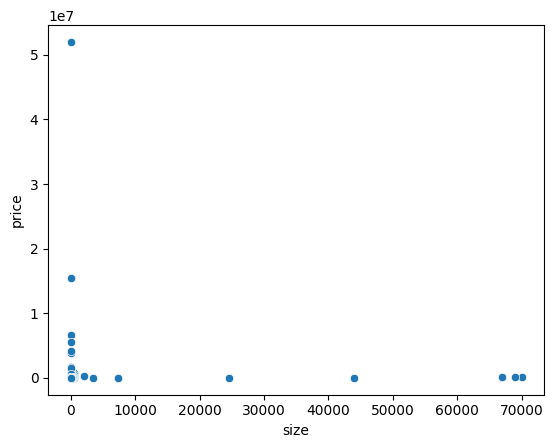

In [ ]:
sns.scatterplot(data = df, x= 'size', y= 'price')
plt.show()

In [16]:
df = df[(df['size'] > 8) & (df['size'] < 500)]

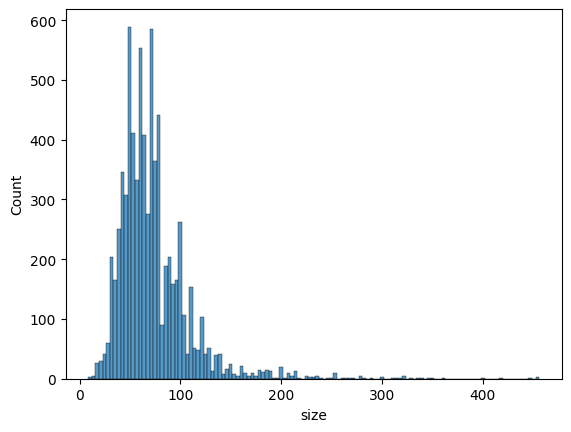

In [17]:
# histogram of size attribute
sns.histplot(data= df, x= 'size')
plt.show()

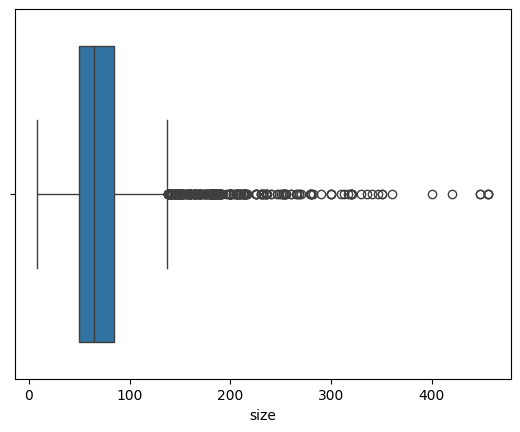

In [18]:
# boxplot of size
sns.boxplot(data= df, x= 'size')
plt.show()

In [19]:
len(df)

7447

In [20]:
len(df[df['size'] > 200])

100

In [21]:
df = df[df['size'] <= 200]

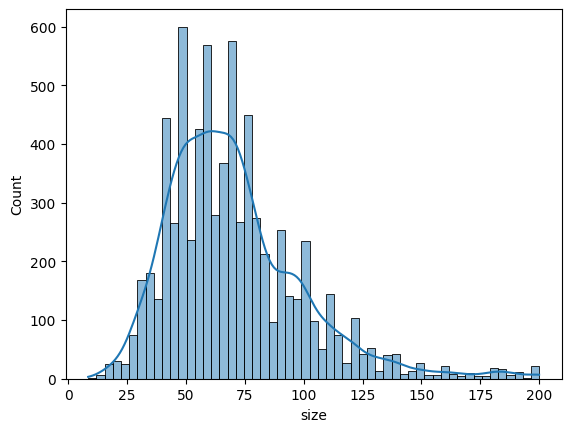

In [22]:
# histogram of size attribute
sns.histplot(data= df, x= 'size', kde= True)
plt.show()

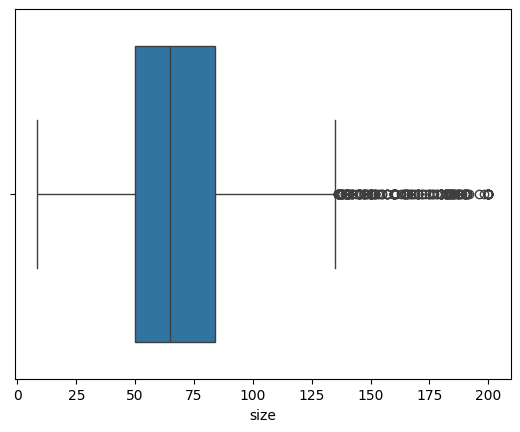

In [23]:
# boxplot of size
sns.boxplot(data= df, x= 'size')
plt.show()

# Level and max level attributes.

In [25]:
df

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.0,5,5,24500.0
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49.0,1,4,32000.0
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64.0,3,9,40000.0
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [26]:
df[['level', 'max_levels']].describe()

,level,max_levels
count,7347.000000,7347.000000
mean,3.689941,6.010480
std,2.227764,2.598566
min,1.000000,1.000000
25%,2.000000,4.000000
50%,3.000000,5.000000
75%,5.000000,9.000000
max,19.000000,25.000000


In [27]:
df['level'].value_counts()

,count
level,
4,1515
2,1389
3,1299
1,1121
5,864
6,309
7,292
9,252
8,230


In [28]:
df['max_levels'].value_counts()

,count
max_levels,
4,2852
9,1791
5,1602
8,274
7,215
12,132
3,125
6,107
2,79


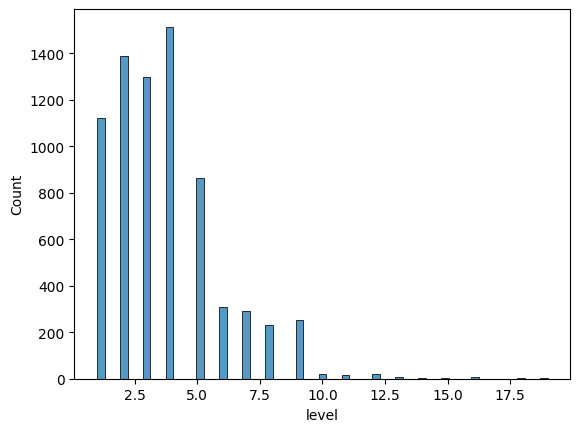

In [29]:
# level histogram
sns.histplot(data= df, x= 'level')
plt.show()

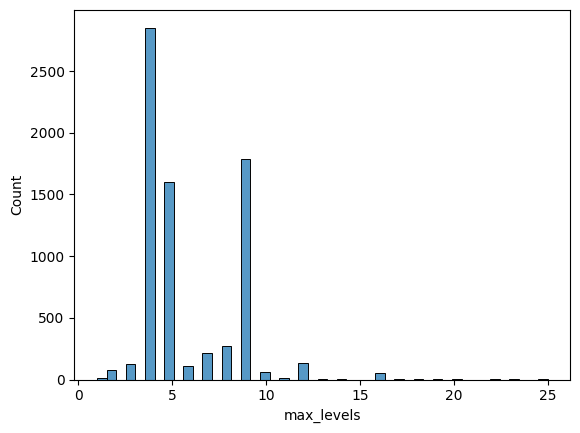

In [30]:
# max levels histogram
sns.histplot(data= df, x= 'max_levels')
plt.show()

# House prices.

In [31]:
df['price'].describe()

,price
count,7.347000e+03
mean,6.904986e+04
std,6.451923e+05
min,2.000000e+00
25%,3.500000e+04
50%,4.600000e+04
75%,6.500000e+04
max,5.200000e+07


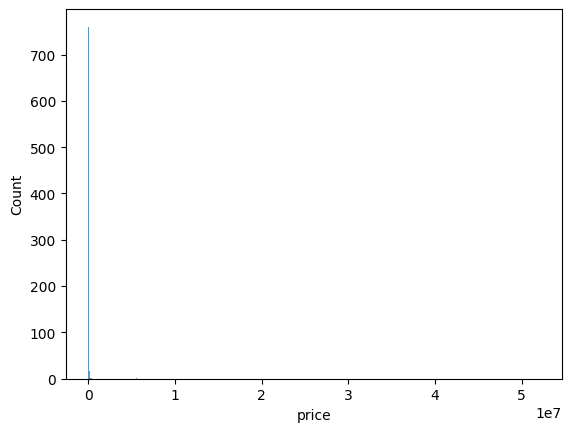

In [32]:
# Price histogram
sns.histplot(x= df['price'])
plt.show()

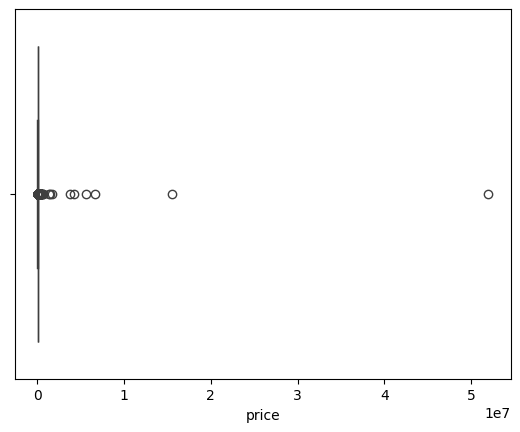

In [ ]:
# price boxplot
sns.boxplot(data= df, x= 'price')
plt.show()

In [33]:
df['price'].sort_values(ascending= False).head(10)

,price
5903,52000000.0
6952,15504000.0
7081,6630000.0
7296,5568000.0
6517,4240000.0
1744,3780000.0
330,1666000.0
7466,1470000.0
6133,1344000.0
4935,644000.0


In [34]:
df['price'].sort_values().head(20)

,price
7224,2.0
273,1000.0
3832,2000.0
7333,2400.0
5073,2864.0
7276,7300.0
195,7500.0
3145,8000.0
7304,8500.0
3695,8999.0


In [35]:
len(df[df['price'] > 1_500_000])

7

In [36]:
len(df[df['price'] < 1_000])

1

In [37]:
# new price range
df = df[(df['price'] <= 1_500_000) & (df['price'] >= 1_000)]

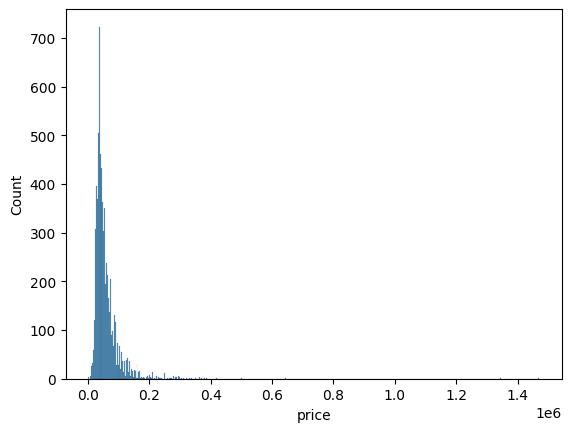

In [38]:
# Price histogram
sns.histplot(x= df['price'])
plt.show()

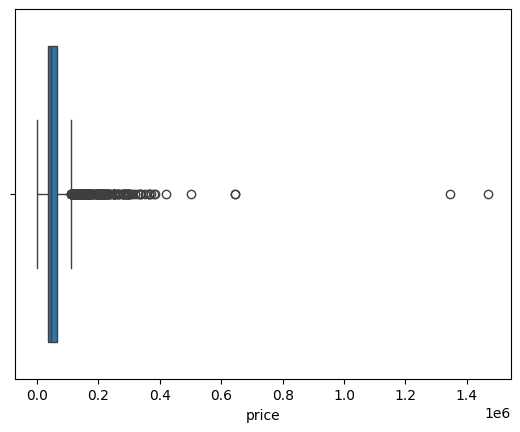

In [39]:
# price boxplot
sns.boxplot(data= df, x= 'price')
plt.show()

In [41]:
# again
df = df[df['price'] < 170_000]

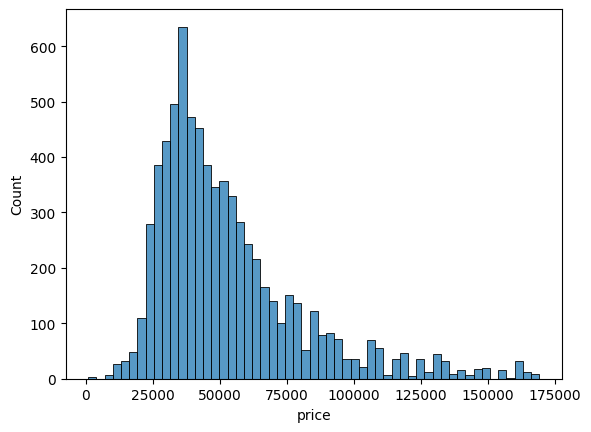

In [42]:
# Price histogram
sns.histplot(x= df['price'])
plt.show()

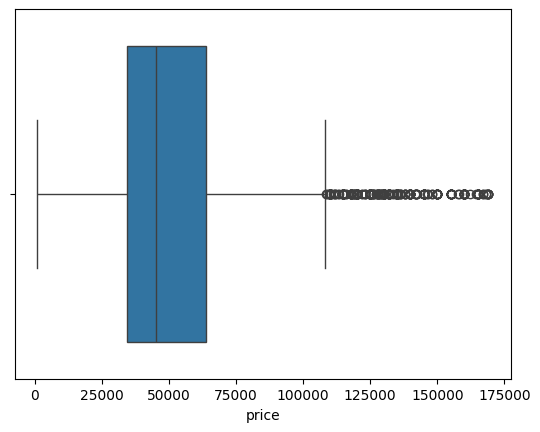

In [43]:
# price boxplot
sns.boxplot(data= df, x= 'price')
plt.show()

In [44]:
df['price'].describe()

,price
count,7205.000000
mean,53079.763636
std,27537.382726
min,1000.000000
25%,34500.000000
50%,45000.000000
75%,64000.000000
max,169000.000000


# The distribution of house by districts

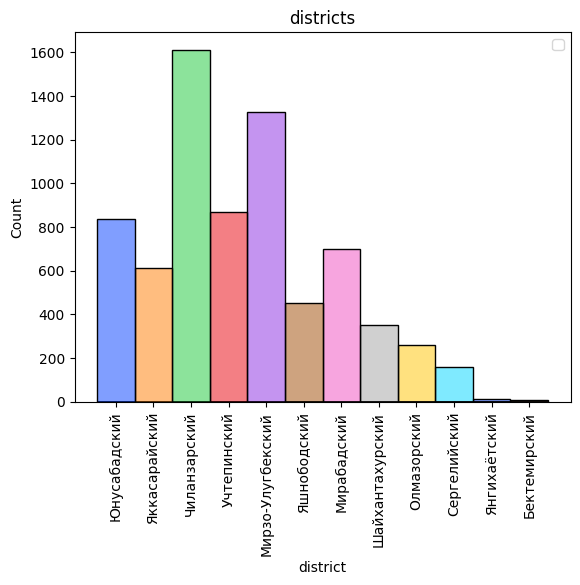

In [47]:
sns.histplot(data= df, x= 'district', palette= 'bright', hue= 'district')
plt.title('districts')
plt.xticks(rotation= 90)
plt.legend('')
plt.show()

/tmp/ipython-input-48-27093717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= df, x= 'district', y= 'price', palette= 'deep')


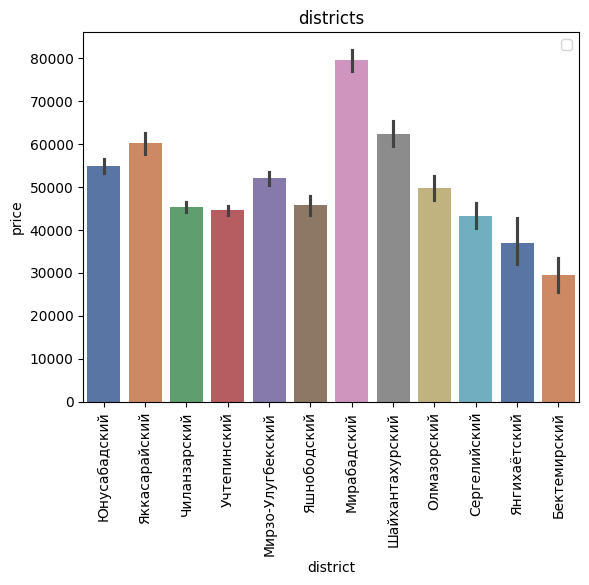

In [48]:
# districts vs price
sns.barplot(data= df, x= 'district', y= 'price', palette= 'deep')
plt.title('districts')
plt.xticks(rotation= 90)
plt.legend('')
plt.show()

In [49]:
len(df['district'].unique())

12

# dropping location column

In [53]:
df.drop('location', axis= 1, inplace= True)

# Data set spliting

In [56]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [57]:
# predictors, labels
x_train = train_set.drop('price', axis= 1)
y_train = train_set['price'].copy()

x_test = test_set.drop('price', axis= 1)
y_test = test_set['price'].copy()

x_num = x_train.drop('district', axis= 1)

# Preprocessing: encoding, normalization


In [54]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [61]:
# creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [62]:
num_attr = list(x_num)
cat_attr = ['district']

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attr),
    ('cat', OneHotEncoder(), cat_attr)
])

In [63]:
x_prepared = full_pipeline.fit_transform(x_train)

In [65]:
x_prepared[:1, :]

array([[-1.53680421, -1.44494117,  0.14022105, -0.77484286,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

# Model Training: Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression

LR_makler = LinearRegression()

In [67]:
LR_makler.fit(x_prepared, y_train)

LinearRegression()

# Testing (manually)

In [69]:
x_test.head()

,district,rooms,size,level,max_levels
3403,Шайхантахурский,3,92.0,4,8
1592,Юнусабадский,1,36.0,1,4
6666,Яккасарайский,3,54.0,3,5
177,Чиланзарский,1,42.0,3,9
234,Олмазорский,3,70.0,1,5


In [70]:
y_test.head()

,price
3403,99000.0
1592,23000.0
6666,63000.0
177,28000.0
234,62000.0


In [122]:
x_test_prepared = full_pipeline.fit_transform(x_test)
x_test_prepared[:1, :]

array([[0.42105664, 0.88929104, 0.14715957, 0.78069803, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [73]:
predicted_labels = LR_makler.predict(x_test_prepared)
predicted_labels

array([75484.67579722, 30424.73060691, 45032.13267846, ...,
       27227.02438831, 28517.83495649, 37172.18778238])

In [74]:
# comparing predicted values with real ones

pred_show = pd.DataFrame({'Predicted': predicted_labels.round(), 'Real': y_test})
pred_show.head()

,Predicted,Real
3403,75485.0,99000.0
1592,30425.0,23000.0
6666,45032.0,63000.0
177,33266.0,28000.0
234,48890.0,62000.0


# Model evaluation by metrics: MAE and RMSE

In [77]:
# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true= y_test, y_pred= predicted_labels)
print('MAE:', mae)

MAE: 10630.610493397615


In [78]:
# RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred= predicted_labels, y_true= y_test)
print('RMSE:', np.sqrt(mse))

RMSE: 15558.114544420423


# Training Random Forest model

In [79]:
from sklearn.ensemble import RandomForestRegressor

RF_makler = RandomForestRegressor()
RF_makler.fit(x_prepared, y_train)

RandomForestRegressor()

In [81]:
predicted_labels = RF_makler.predict(x_test_prepared)

# model Evaluation

In [82]:
# evaluation
# MAE

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_labels)
print('MAE:', mae)

MAE: 9112.655555922656


In [83]:
# RMSE
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_labels)
print('RMSE:', np.sqrt(mse))

RMSE: 13860.941267917231


# Model deployment: saving the model

In [84]:
import joblib

joblib.dump(RF_makler, 'RF_makler.jbl')

['RF_makler.jbl']

# Loading and using the model

In [85]:
model = joblib.load('RF_makler.jbl')

In [86]:
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


In [228]:
column_names = ['district', 'rooms', 'size', 'level', 'max_levels']

user_df = pd.DataFrame(columns= column_names)

# custom input
district = input("District: ")

# District name conversion
match district:
  case 'Chilonzor':
    district = 'Чиланзарский'
  case 'Yunusobod':
    district = 'Юнусабадский'
  case 'Yakkasaroy':
    district = 'Яккасарайский'
  case 'Uchtepa':
    district = 'Учтепинский'
  case "Mirzo Ulug'bek":
    district = 'Мирзо-Улугбекский'
  case 'Yashnabod':
    district = 'Яшнободский'
  case 'Mirobod':
    district = 'Мирабадский'
  case 'Shayxontohur':
    district = 'Шайхантахурский'
  case 'Olmazor':
    district = 'Олмазорский'
  case 'Sergeli':
    district = 'Сергелийский'
  case 'Yangihayot':
    district = 'Янгихаётский'
  case 'Bektemir':
    district = 'Бектемирский'
  case _:
    print('Invalid district name!')

rooms = int(input('Number of rooms: '))
size = float(input('Area: '))
level = int(input('Level: '))
max_levels = int(input('Maximum level: '))

user_df.loc[len(user_df)] = [district, rooms, size, level, max_levels]

# preprocessing
combined_df = pd.concat([x_test, user_df])
user_df_prepared = full_pipeline.fit_transform(combined_df)

# predicting
predicted_value = model.predict(user_df_prepared)
print('The predicted price: ', predicted_value[-1].round())

District: Chilonzor
Number of rooms: 3
Area: 70
Level: 3
Maximum level: 5
The predicted price:  56029.0
